# Predicting Weekly Dengue Fever Rates in San Juan, Puerto Rico and Iquitos, Peru
## Initial Data Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('../data/dengue_features_entire.csv')

#### The first analysis will be performed with the rows with NaN values deleted from the table

In [5]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

### Generalized field descriptions with column names (the similar columns are grouped together):
 - Normalized different vegetation index (NE):  ``ndvi_ne``
 - Normalized different vegetation index (NW):  ``ndvi_nw``
 - Normalized different vegetation index (SW):  ``ndvi_sw``
 - Normalized different vegetation index (SE):  ``ndvi_se``
 - Total precipitation:  ``precipitation_amt_mm``, ``reanalysis_sat_precip_amt_mm``, ``station_precip_mm``, ``reanalysis_precip_amt_kg_per_m2``
 - Average temperature - ``reanalysis_air_temp_k``, ``reanalysis_avg_temp_k``, ``station_avg_temp_c``
 - Maximum air temperature - ``reanalysis_max_air_temp_k``, ``station_max_temp_c``
 - Minimum air temperature - ``reanalysis_min_air_temp_k``, ``station_min_temp_c``
 - Mean relative humidity - ``reanalysis_relative_humidity_percent``
 - Mean specific humidity - ``reanalysis_specific_humidity_g_per_kg``
 - Diurnal temperature range - ``reanalysis_tdtr_k``, ``station_diur_temp_rng_c``
 - Total dengue cases per week - ``total_cases``
 - Year / date - ``year``, ``weekofyear``, ``week_start_date``
 - City measured - ``city``

In [7]:
df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [8]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [9]:
print('{} columns, {} rows'.format(len(df.columns), len(df)))

25 columns, 1456 rows


In [10]:
print('{} rows for San Juan, {} rows for Iquito'.format( len(df[df['city'] == "sj"]), len(df[df['city'] == "iq"]) ))

936 rows for San Juan, 520 rows for Iquito


In [11]:
print('Data available for the following years: {}'.format(df['year'].unique()))

Data available for the following years: [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010]


In [12]:
print('Data available for San Juan for the following years: {}'.format( df[df['city'] == "sj"]['year'].unique() ))

Data available for San Juan for the following years: [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008]


#### Years of data 

In [13]:
print('Data available for Iquitos for the following years: {}'.format( df[df['city'] == "iq"]['year'].unique() ))

Data available for Iquitos for the following years: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010]


In [14]:
sj = df[df['city'] == "sj"]

In [15]:
iq = df[df['city'] == "iq"]

In [58]:
from matplotlib.pyplot import xticks

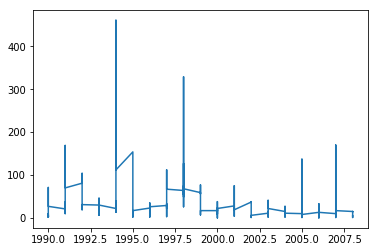

In [60]:
plt.plot(sj['year'], sj['total_cases'])

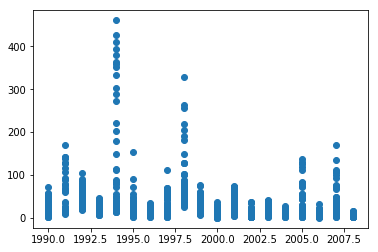

In [16]:
plt.scatter(sj['year'], sj['total_cases'])

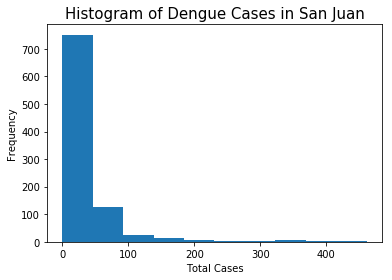

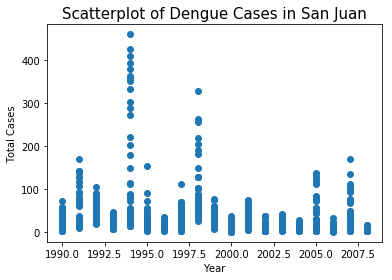

In [17]:
plt.hist(sj['total_cases'])
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.title('Histogram of Dengue Cases in San Juan', fontsize=15)
plt.show()

plt.scatter(sj['year'], sj['total_cases'])
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Scatterplot of Dengue Cases in San Juan', fontsize=15)
plt.show()

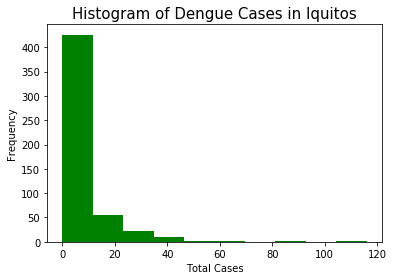

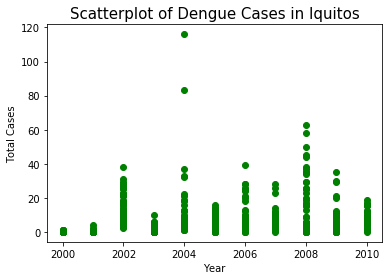

In [18]:
plt.hist(iq['total_cases'], color='green')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.title('Histogram of Dengue Cases in Iquitos', fontsize=15)
plt.show()

plt.scatter(iq['year'], iq['total_cases'], color='green')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Scatterplot of Dengue Cases in Iquitos', fontsize=15)
plt.show()

In [19]:
sj.corr()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
year,1.000000,-0.073143,-0.392312,-0.498367,-0.014863,-0.077928,0.031612,0.185813,0.189696,0.015428,...,-0.286206,0.031612,0.018129,0.325336,-0.097312,-0.276963,-0.172907,-0.002097,0.082920,-0.212690
weekofyear,-0.073143,1.000000,-0.020271,-0.023549,-0.009380,-0.075804,0.231961,0.575381,0.561001,0.578072,...,0.306771,0.231961,0.585224,-0.099084,0.485038,-0.137093,0.325748,0.520129,0.213336,0.287134
ndvi_ne,-0.392312,-0.020271,1.000000,0.673037,0.234049,0.177792,-0.048727,-0.073170,-0.071176,-0.040008,...,0.039138,-0.048727,-0.035235,-0.009248,0.064027,0.142875,0.092365,0.018818,-0.085993,0.037639
ndvi_nw,-0.498367,-0.023549,0.673037,1.000000,0.196343,0.214615,-0.032351,-0.077457,-0.076375,-0.026070,...,0.077339,-0.032351,-0.020595,-0.050657,0.087298,0.184124,0.136659,0.016428,-0.076237,0.075307
ndvi_se,-0.014863,-0.009380,0.234049,0.196343,1.000000,0.821354,-0.119386,-0.014601,-0.011905,-0.062773,...,-0.114294,-0.119386,-0.058442,0.029358,-0.056545,0.018121,-0.063718,-0.069275,-0.140286,0.001113
ndvi_sw,-0.077928,-0.075804,0.177792,0.214615,0.821354,1.000000,-0.118752,-0.043488,-0.035999,-0.087787,...,-0.118769,-0.118752,-0.080840,0.052465,-0.041495,0.069843,-0.017866,-0.074045,-0.175239,-0.000333
precipitation_amt_mm,0.031612,0.231961,-0.048727,-0.032351,-0.119386,-0.118752,1.000000,0.233912,0.222311,0.402744,...,0.501149,1.000000,0.410019,-0.093928,0.196218,-0.158479,0.193713,0.224667,0.565961,0.060211
reanalysis_air_temp_k,0.185813,0.575381,-0.073170,-0.077457,-0.014601,-0.043488,0.233912,1.000000,0.997495,0.903287,...,0.299139,0.233912,0.904819,0.175060,0.880931,0.039391,0.697949,0.832863,0.113726,0.181917
reanalysis_avg_temp_k,0.189696,0.561001,-0.071176,-0.076375,-0.011905,-0.035999,0.222311,0.997495,1.000000,0.895123,...,0.285179,0.222311,0.896178,0.198187,0.879129,0.053967,0.703316,0.827112,0.097849,0.175267
reanalysis_dew_point_temp_k,0.015428,0.578072,-0.040008,-0.026070,-0.062773,-0.087787,0.402744,0.903287,0.895123,1.000000,...,0.679369,0.402744,0.998532,-0.035965,0.868930,-0.056715,0.689811,0.850157,0.285280,0.203774


In [20]:
iq.corr()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
year,1.000000,-0.136842,-0.063628,0.030720,-0.071596,-0.017316,0.085287,0.023359,0.006082,0.318394,...,0.256166,0.085287,0.321922,-0.235968,0.082251,-0.104788,0.041432,0.128209,-0.027436,0.179451
weekofyear,-0.136842,1.000000,0.253895,0.220770,0.321254,0.256479,-0.116018,0.293305,0.305944,-0.100417,...,-0.287737,-0.116018,-0.090302,0.353218,0.080976,0.243895,0.206878,-0.106756,-0.040660,-0.011850
ndvi_ne,-0.063628,0.253895,1.000000,0.764407,0.767745,0.842784,-0.012388,0.152740,0.167468,-0.031796,...,-0.134387,-0.012388,-0.031102,0.163886,0.107257,0.150664,0.142603,-0.015661,0.008736,0.020215
ndvi_nw,0.030720,0.220770,0.764407,1.000000,0.644194,0.764829,-0.060257,0.152423,0.168796,-0.034734,...,-0.133374,-0.060257,-0.030651,0.164950,0.120126,0.203723,0.156463,-0.098044,-0.013002,-0.009586
ndvi_se,-0.071596,0.321254,0.767745,0.644194,1.000000,0.714577,-0.043946,0.196518,0.207895,-0.063731,...,-0.190925,-0.043946,-0.061694,0.221019,0.113097,0.189040,0.166627,-0.061689,0.012081,-0.041067
ndvi_sw,-0.017316,0.256479,0.842784,0.764829,0.714577,1.000000,-0.020351,0.163954,0.176197,-0.030800,...,-0.140045,-0.020351,-0.027352,0.169364,0.112064,0.181032,0.175897,-0.063004,-0.005394,0.032999
precipitation_amt_mm,0.085287,-0.116018,-0.012388,-0.060257,-0.043946,-0.020351,1.000000,-0.048534,-0.054303,0.471734,...,0.431543,1.000000,0.468370,-0.378758,0.105683,-0.183141,-0.012054,0.306541,0.378766,0.090171
reanalysis_air_temp_k,0.023359,0.293305,0.152740,0.152423,0.196518,0.163954,-0.048534,1.000000,0.973319,0.151199,...,-0.547910,-0.048534,0.177794,0.552305,0.602617,0.505507,0.641230,0.243346,-0.126249,0.097098
reanalysis_avg_temp_k,0.006082,0.305944,0.167468,0.168796,0.207895,0.176197,-0.054303,0.973319,1.000000,0.142334,...,-0.540006,-0.054303,0.166097,0.601629,0.569821,0.505558,0.618017,0.214493,-0.130987,0.079872
reanalysis_dew_point_temp_k,0.318394,-0.100417,-0.031796,-0.034734,-0.063731,-0.030800,0.471734,0.151199,0.142334,1.000000,...,0.741762,0.471734,0.997775,-0.608600,0.327797,-0.263062,0.080237,0.617305,0.183165,0.230401


Heatmap of San Juan data

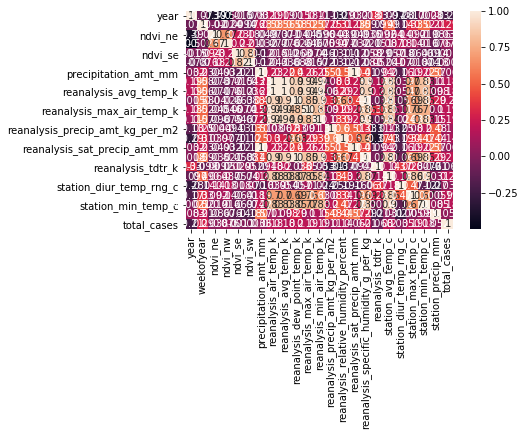

In [21]:
sns.heatmap(sj.corr(), annot=True)

Heatmap of Iquitos data

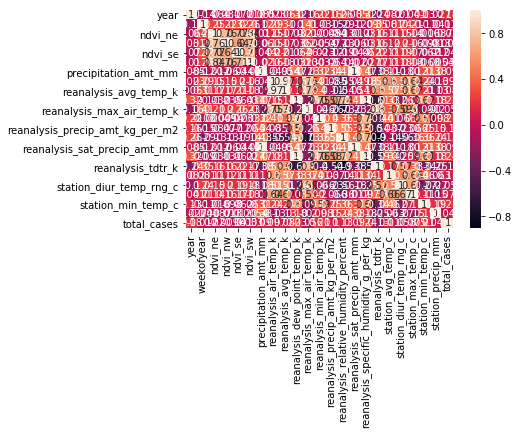

In [22]:
sns.heatmap(iq.corr(), annot=True)

### Missing values

Is the dataset complete? If not, how many total missing values are there? How many rows are there with missing values?

#### Number of missing cells for the entire feature set
Quickly see what the greatest number of missing cells are

In [23]:
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

#### Number of rows for the entire feature set that have missing (NaN) values

In [24]:
print( '{} rows '.format(sum([True for idx,row in df.iterrows() if any(row.isnull())]) ))

257 rows 


#### Number of rows for San Juan data that have missing (NaN) values

In [25]:
print('{} rows with missing data for San Juan'.format(sum([True for idx, row in sj.iterrows() if any(row.isnull())])))

209 rows with missing data for San Juan


#### Number of rows for Iquitos that have missing (NaN) values

In [26]:
print('{} rows with missing data for Iquitos'.format(sum([True for idx, row in iq.iterrows() if any(row.isnull())])))

48 rows with missing data for Iquitos


### As I develop the models, I'll have to decide if I want to delete the rows with missing data or replace the missing values (e.g. with the mean, median, or mode)

In [27]:
df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


In [28]:
# fields_to_plot = df[['ndvi_ne', 'ndvi_nw','ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
#        'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
#        'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
#        'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
#        'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
#        'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
#        'station_min_temp_c', 'station_precip_mm', 'total_cases']]

## Data conversion

In analyzing the data, I noticed that the precipitation_amt_mm and reanalysis_sat_precip_amt_mm columns looked like they contained the same data. I plotted them, and they did have a perfectly linear relationship. Because of this, I will be deleting one of the duplicate features.

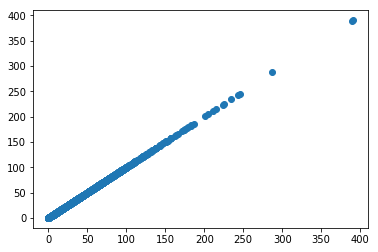

In [29]:
plt.scatter(df['precipitation_amt_mm'], df['reanalysis_sat_precip_amt_mm'])
plt.show()

In [30]:
df = df.drop('reanalysis_sat_precip_amt_mm', 1)

In [31]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


I also noticed that some of the data is in Celsius and some of it is in Kelvin. I will be converting the data in Celsuis to Kelvin for consistency (K = C + 273.15)

In [32]:
'''
Convert the station_min_temp_c from Celsius to Kelvin
and drop the columns with Celsius in the dataframe
'''

station_min_temp_k = []
columns_in_celsius = ['station_min_temp_c', 'station_avg_temp_c', 'station_max_temp_c', 'station_diur_temp_rng_c']
for column in columns_in_celsius:
    converted_data = [value + 273.15 for value in df[column]]
    new_column_name = column.replace('_c', '_k')
    df[new_column_name] = pd.Series(converted_data, index=df.index)
    df.drop(column, inplace=True, axis=1)

Dataframe should no longer contain Celius values

In [33]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_precip_mm,total_cases,station_min_temp_k,station_avg_temp_k,station_max_temp_k,station_diur_temp_rng_k
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,14.012857,2.628571,16.0,4,293.15,298.592857,302.55,280.050000
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,15.372857,2.371429,8.6,5,295.35,299.864286,304.85,279.521429
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,16.848571,2.300000,41.4,4,295.95,299.864286,305.35,279.635714
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,16.672857,2.428571,4.0,3,296.45,300.621429,306.45,279.921429
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,17.210000,3.014286,5.8,6,297.05,302.092857,308.15,282.521429


### Analysis of similar features

Some of the features seem similar, e.g. ``station_min_temp_k`` and ``reanalysis_min_air_temp_k``. The following calculates the difference between the two values for each week.

In [34]:
max_difference = 0
for i, (station, reanalysis) in enumerate(zip(df['station_min_temp_k'] , df['reanalysis_min_air_temp_k'])):
    print('{}    {} | {}'.format(i, float(station), float(reanalysis)))
    temp_difference = float(station) - float(reanalysis)
    print('         {} temperature difference'.format(temp_difference))
    if temp_difference > max_difference:
        max_difference = temp_difference

0    293.15 | 295.9
         -2.75 temperature difference
1    295.34999999999997 | 296.4
         -1.0500000000000114 temperature difference
2    295.95 | 297.3
         -1.3500000000000227 temperature difference
3    296.45 | 297.0
         -0.5500000000000114 temperature difference
4    297.04999999999995 | 297.5
         -0.4500000000000455 temperature difference
5    297.04999999999995 | 298.1
         -1.0500000000000682 temperature difference
6    296.45 | 297.7
         -1.25 temperature difference
7    295.95 | 298.4
         -2.4499999999999886 temperature difference
8    295.95 | 297.7
         -1.75 temperature difference
9    297.54999999999995 | 298.7
         -1.150000000000034 temperature difference
10    294.84999999999997 | 298.0
         -3.150000000000034 temperature difference
11    297.04999999999995 | 297.3
         -0.25000000000005684 temperature difference
12    295.95 | 297.1
         -1.150000000000034 temperature difference
13    295.95 | 298.3
         -2.

         -0.5500000000000114 temperature difference
732    294.84999999999997 | 297.2
         -2.3500000000000227 temperature difference
733    295.95 | 298.2
         -2.25 temperature difference
734    297.04999999999995 | 298.0
         -0.9500000000000455 temperature difference
735    295.95 | 297.8
         -1.8500000000000227 temperature difference
736    297.04999999999995 | 297.9
         -0.8500000000000227 temperature difference
737    296.45 | 298.4
         -1.9499999999999886 temperature difference
738    296.45 | 298.6
         -2.150000000000034 temperature difference
739    298.15 | 299.0
         -0.8500000000000227 temperature difference
740    297.04999999999995 | 298.4
         -1.3500000000000227 temperature difference
741    297.04999999999995 | 298.5
         -1.4500000000000455 temperature difference
742    297.54999999999995 | 298.4
         -0.8500000000000227 temperature difference
743    297.54999999999995 | 299.2
         -1.650000000000034 temperature dif

In [35]:
print('The max temperature difference between the two min temperature measurements = {} Kelvin'.format(round(max_difference, 2)))

The max temperature difference between the two min temperature measurements = 6.45 Kelvin


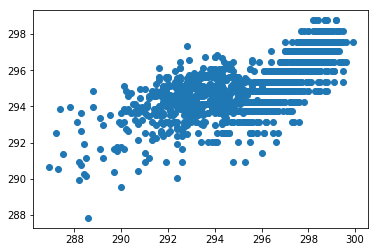

In [36]:
plt.scatter(df['reanalysis_min_air_temp_k'], df['station_min_temp_k'])
plt.show()

In [37]:
max_difference = 0
for i, (station, reanalysis) in enumerate(zip(df['station_max_temp_k'] , df['reanalysis_max_air_temp_k'])):
    print('{}    {} | {}'.format(i, float(station), float(reanalysis)))
    temp_difference = float(station) - float(reanalysis)
    print('         {} temperature difference'.format(temp_difference))
    if temp_difference > max_difference:
        max_difference = temp_difference

0    302.54999999999995 | 299.8
         2.749999999999943 temperature difference
1    304.84999999999997 | 300.9
         3.9499999999999886 temperature difference
2    305.34999999999997 | 300.5
         4.849999999999966 temperature difference
3    306.45 | 301.4
         5.050000000000011 temperature difference
4    308.15 | 301.9
         6.25 temperature difference
5    307.54999999999995 | 302.4
         5.149999999999977 temperature difference
6    305.34999999999997 | 301.3
         4.0499999999999545 temperature difference
7    307.04999999999995 | 300.6
         6.449999999999932 temperature difference
8    307.04999999999995 | 302.1
         4.949999999999932 temperature difference
9    307.04999999999995 | 302.3
         4.749999999999943 temperature difference
10    304.84999999999997 | 301.8
         3.0499999999999545 temperature difference
11    305.95 | 302.0
         3.9499999999999886 temperature difference
12    304.84999999999997 | 301.8
         3.049999999999954

         3.75 temperature difference
888    305.95 | 303.3
         2.6499999999999773 temperature difference
889    307.04999999999995 | 303.3
         3.749999999999943 temperature difference
890    307.54999999999995 | 302.9
         4.649999999999977 temperature difference
891    307.04999999999995 | 303.6
         3.449999999999932 temperature difference
892    307.04999999999995 | 303.7
         3.349999999999966 temperature difference
893    306.45 | 303.2
         3.25 temperature difference
894    306.45 | 303.0
         3.4499999999999886 temperature difference
895    306.45 | 303.2
         3.25 temperature difference
896    306.45 | 302.9
         3.5500000000000114 temperature difference
897    305.95 | 303.1
         2.849999999999966 temperature difference
898    304.84999999999997 | 303.0
         1.849999999999966 temperature difference
899    304.84999999999997 | 303.0
         1.849999999999966 temperature difference
900    307.04999999999995 | 302.9
         4.14999

In [38]:
print('The max temperature difference between the two max temperature measurements = {} Kelvin'.format(round(max_difference, 2)))

The max temperature difference between the two max temperature measurements = 7.25 Kelvin


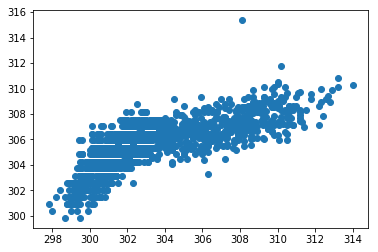

In [39]:
plt.scatter(df['reanalysis_max_air_temp_k'], df['station_max_temp_k'])
plt.show()

### Standard deviations 

#### Standard deviation of the total cases (San Juan and Iquitos combined)

In [40]:
std_dev = df['total_cases'].std()
print('std dev of total cases (both cities): {}'.format(std_dev))

std dev of total cases (both cities): 43.59600016310749


In [41]:
sj = df[df['city'] == "sj"]
sj_std_dev = sj['total_cases'].std()
print('std dev of total cases (San Juan): {}'.format(sj_std_dev))

std dev of total cases (San Juan): 51.38137249715141


In [42]:
iq = df[df['city'] == "iq"]
iq_std_dev = iq['total_cases'].std()
print('std dev of total cases (Iquito): {}'.format(iq_std_dev))

std dev of total cases (Iquito): 10.765478342208691


In [43]:
weeks_with_cases_over_100 = df[df['total_cases'] >= 100]

In [44]:
weeks_with_cases_over_100['year'].unique()

array([1991, 1992, 1994, 1995, 1997, 1998, 2005, 2007, 2004])

In [45]:
sj_sum_total_cases = sj['total_cases'].sum()
iq_sum_total_cases = iq['total_cases'].sum()
print('- {} total dengue fever cases in San Juan for {} total weeks'.format(sj_sum_total_cases, len(sj)))
print('- {} total dengue fever cases in Iquitos for {} total weeks'.format(iq_sum_total_cases, len(iq)))

sj_cases_over_100 = len(weeks_with_cases_over_100[weeks_with_cases_over_100['city'] == 'sj'])
sj_years_over_100 = weeks_with_cases_over_100['year'][weeks_with_cases_over_100['city'] == 'sj'].unique()
iq_cases_over_100 = len(weeks_with_cases_over_100[weeks_with_cases_over_100['city'] == 'iq'])
iq_years_over_100 = weeks_with_cases_over_100['year'][weeks_with_cases_over_100['city'] == 'iq'].unique()

print('- {} weeks with over 100 cases in San Juan in the following years: {}'.format(sj_cases_over_100, sj_years_over_100))
print('- {} weeks with over 100 cases in Iquitos in the following year: {}'.format(iq_cases_over_100, iq_years_over_100))


- 31993 total dengue fever cases in San Juan for 936 total weeks
- 3934 total dengue fever cases in Iquitos for 520 total weeks
- 56 weeks with over 100 cases in San Juan in the following years: [1991 1992 1994 1995 1997 1998 2005 2007]
- 1 weeks with over 100 cases in Iquitos in the following year: [2004]


In [46]:
weeks_with_cases_over_100.corr()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_precip_mm,total_cases,station_min_temp_k,station_avg_temp_k,station_max_temp_k,station_diur_temp_rng_k
year,1.000000,-0.229585,-0.266822,-0.317861,0.039905,-0.091567,0.189173,0.697253,0.736359,0.615423,...,-0.156107,-0.179558,0.624370,0.554927,0.089301,-0.294623,0.347355,0.490369,0.330908,-0.068466
weekofyear,-0.229585,1.000000,0.210511,0.310986,0.191106,0.313540,-0.375353,-0.357764,-0.346090,-0.398889,...,-0.012281,0.007996,-0.393313,0.041584,-0.134219,0.130857,-0.210215,-0.304649,-0.144837,0.158747
ndvi_ne,-0.266822,0.210511,1.000000,0.487132,0.410298,0.448115,-0.068538,-0.514203,-0.448114,-0.141408,...,0.220226,0.592266,-0.134225,0.250317,-0.132786,0.087986,-0.142957,-0.135374,-0.137267,0.141457
ndvi_nw,-0.317861,0.310986,0.487132,1.000000,0.438551,0.542022,-0.200962,-0.540652,-0.481118,-0.309881,...,0.216345,0.424848,-0.304517,0.097163,-0.198028,-0.004996,-0.034593,-0.252188,-0.243005,-0.142098
ndvi_se,0.039905,0.191106,0.410298,0.438551,1.000000,0.803211,-0.238569,-0.118320,-0.078147,-0.011933,...,0.028906,0.177490,-0.012843,0.162625,-0.308552,0.063661,0.125647,0.130170,-0.030952,-0.243125
ndvi_sw,-0.091567,0.313540,0.448115,0.542022,0.803211,1.000000,-0.157910,-0.310715,-0.250881,-0.080157,...,0.264997,0.384542,-0.070214,0.321973,-0.273783,0.119573,0.052791,0.026455,-0.038898,-0.204818
precipitation_amt_mm,0.189173,-0.375353,-0.068538,-0.200962,-0.238569,-0.157910,1.000000,0.021079,0.046901,0.182281,...,0.360411,0.205904,0.194024,0.139158,0.281827,-0.177758,-0.176905,-0.119016,0.023548,0.093814
reanalysis_air_temp_k,0.697253,-0.357764,-0.514203,-0.540652,-0.118320,-0.310715,0.021079,1.000000,0.989637,0.737103,...,-0.306516,-0.482416,0.730948,0.259367,-0.030711,-0.144065,0.671989,0.835137,0.612939,-0.147554
reanalysis_avg_temp_k,0.736359,-0.346090,-0.448114,-0.481118,-0.078147,-0.250881,0.046901,0.989637,1.000000,0.754872,...,-0.295713,-0.437540,0.750781,0.365835,-0.054987,-0.175018,0.679600,0.831034,0.614129,-0.149515
reanalysis_dew_point_temp_k,0.615423,-0.398889,-0.141408,-0.309881,-0.011933,-0.080157,0.182281,0.737103,0.754872,1.000000,...,0.196758,0.234646,0.998989,0.262987,0.137531,-0.070946,0.572488,0.747672,0.474499,-0.242289


In [47]:
weeks_with_cases_over_100[weeks_with_cases_over_100['city'] == 'sj'].corr()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_precip_mm,total_cases,station_min_temp_k,station_avg_temp_k,station_max_temp_k,station_diur_temp_rng_k
year,1.000000,-0.269730,-0.446832,-0.495448,-0.011473,-0.222419,0.179716,0.793612,0.790120,0.614619,...,-0.207164,-0.338742,0.620921,0.603552,0.108726,-0.282070,0.347355,0.490369,0.330908,-0.068466
weekofyear,-0.269730,1.000000,0.104305,0.230524,0.132193,0.233431,-0.394739,-0.326624,-0.326734,-0.418179,...,-0.054978,-0.105919,-0.416870,-0.110178,-0.120131,0.151943,-0.210215,-0.304649,-0.144837,0.158747
ndvi_ne,-0.446832,0.104305,1.000000,0.244149,0.275468,0.197926,-0.118970,-0.407125,-0.397160,-0.201919,...,0.099873,0.376130,-0.210175,-0.269732,-0.091244,0.179177,-0.142957,-0.135374,-0.137267,0.141457
ndvi_nw,-0.495448,0.230524,0.244149,1.000000,0.339323,0.341689,-0.282031,-0.440721,-0.435585,-0.399708,...,0.091873,0.119745,-0.410103,-0.528836,-0.173668,0.061096,-0.034593,-0.252188,-0.243005,-0.142098
ndvi_se,-0.011473,0.132193,0.275468,0.339323,1.000000,0.799200,-0.270684,-0.010655,-0.008675,-0.026986,...,-0.052097,-0.020619,-0.035923,-0.090711,-0.293577,0.100390,0.125647,0.130170,-0.030952,-0.243125
ndvi_sw,-0.222419,0.233431,0.197926,0.341689,0.799200,1.000000,-0.230155,-0.146262,-0.152861,-0.125862,...,0.155977,0.056272,-0.130471,-0.137749,-0.263606,0.212381,0.052791,0.026455,-0.038898,-0.204818
precipitation_amt_mm,0.179716,-0.394739,-0.118970,-0.282031,-0.270684,-0.230155,1.000000,0.043023,0.059596,0.178285,...,0.354475,0.200074,0.188916,0.124857,0.290564,-0.171782,-0.176905,-0.119016,0.023548,0.093814
reanalysis_air_temp_k,0.793612,-0.326624,-0.407125,-0.440721,-0.010655,-0.146262,0.043023,1.000000,0.996750,0.790526,...,-0.258245,-0.408135,0.791531,0.654299,-0.060138,-0.181574,0.671989,0.835137,0.612939,-0.147554
reanalysis_avg_temp_k,0.790120,-0.326734,-0.397160,-0.435585,-0.008675,-0.152861,0.059596,0.996750,1.000000,0.778680,...,-0.268320,-0.420535,0.779289,0.671782,-0.071892,-0.195769,0.679600,0.831034,0.614129,-0.149515
reanalysis_dew_point_temp_k,0.614619,-0.418179,-0.201919,-0.399708,-0.026986,-0.125862,0.178285,0.790526,0.778680,1.000000,...,0.186384,0.236111,0.999201,0.298664,0.144987,-0.064377,0.572488,0.747672,0.474499,-0.242289


In [48]:
weeks_with_cases_over_100[weeks_with_cases_over_100['city'] == 'iq']

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_precip_mm,total_cases,station_min_temp_k,station_avg_temp_k,station_max_temp_k,station_diur_temp_rng_k
1167,iq,2004,50,2004-12-09,0.323429,0.309514,0.275829,0.3359,70.04,297.787143,...,91.0,93.938571,18.207143,6.5,9.9,116,NaN,NaN,NaN,NaN


In [49]:
weeks_with_zero_cases = df[df['total_cases'] == 0]

In [50]:
len(weeks_with_zero_cases)

100

In [51]:
weeks_with_zero_cases

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_precip_mm,total_cases,station_min_temp_k,station_avg_temp_k,station_max_temp_k,station_diur_temp_rng_k
522,sj,2000,19,2000-05-13,NaN,0.098150,0.149086,0.134386,21.53,298.320000,...,16.35,78.337143,15.638571,2.771429,7.7,0,295.35,299.792857,303.75,280.064286
523,sj,2000,20,2000-05-20,0.086500,0.087750,0.175283,0.160129,68.14,298.771429,...,10.06,77.712857,15.918571,2.642857,83.3,0,294.25,299.750000,305.35,280.278571
526,sj,2000,23,2000-06-10,0.145900,0.138175,0.168729,0.118843,46.02,299.624286,...,10.95,79.051429,17.034286,2.457143,4.8,0,296.45,301.007143,304.85,279.592857
825,sj,2006,10,2006-03-12,-0.013133,0.018275,0.177300,0.150300,0.00,297.988571,...,7.50,74.280000,14.497143,3.428571,3.3,0,294.25,298.678571,303.75,279.992857
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,43.19,92.418571,16.651429,8.928571,3.0,0,293.85,299.550000,305.65,283.925000
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,46.00,93.581429,16.862857,10.314286,55.6,0,293.95,300.050000,307.15,284.716667
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,64.77,95.848571,17.120000,7.385714,38.1,0,293.85,299.950000,306.15,284.616667
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,23.96,87.234286,14.431429,9.114286,30.0,0,287.85,298.916667,304.65,283.683333
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,31.80,88.161429,15.444286,9.500000,4.0,0,292.25,299.750000,306.45,284.630000
941,iq,2000,31,2000-08-05,0.205529,0.190757,0.231671,0.255314,16.24,297.191429,...,1.00,74.728571,13.421429,13.771429,11.5,0,290.15,298.490000,305.15,284.090000


In [52]:
df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_precip_mm,total_cases,station_min_temp_k,station_avg_temp_k,station_max_temp_k,station_diur_temp_rng_k
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,14.012857,2.628571,16.0,4,293.15,298.592857,302.55,280.050000
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,15.372857,2.371429,8.6,5,295.35,299.864286,304.85,279.521429
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,16.848571,2.300000,41.4,4,295.95,299.864286,305.35,279.635714
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,16.672857,2.428571,4.0,3,296.45,300.621429,306.45,279.921429
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,17.210000,3.014286,5.8,6,297.05,302.092857,308.15,282.521429
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,26.49,79.891429,17.212857,2.100000,39.1,2,297.05,301.264286,307.55,280.092857
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,38.60,82.000000,17.234286,2.042857,29.7,4,296.45,300.564286,305.35,279.921429
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,30.00,83.375714,17.977143,1.571429,21.1,5,295.95,301.521429,307.05,280.835714
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,37.51,82.768571,17.790000,1.885714,21.1,10,295.95,301.478571,307.05,280.535714
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,28.40,81.281429,18.071429,2.014286,1.1,6,297.55,301.478571,307.05,279.664286


### Because of the difference of the number of dengue fever cases, the std dev of the total dengue fever cases in the two cities, and the number of weeks with cases over 100, I will separate the data and create a different model for each city when possible.

#### Exporting the two cities as separate dataframes 

In [53]:
sj.to_csv('../data/sj.csv')

In [54]:
iq.to_csv('../data/iq.csv')

In [55]:
# plot the data on time series
# fit a trend line to that 
# use that as a scaling factor to forecast your data
